In [1]:
from utils import *

In [2]:
x = np.array((2,2,2,2,2,2)).reshape(1,-1)
y = np.array((1,1,1,1,1,1)).reshape(1,-1)
NTK(depth=2, c=2, bias=0, bias_bounds='fixed')(x,y)

array([[11.99998257]])

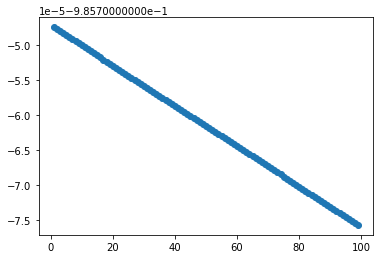

In [3]:
x = np.array((2,2,2,2,2,2)).reshape(1,-1)
y = np.array((1,1,1,1,1,1)).reshape(1,-1)
# y = np.array((0,0,0,0,0,0,0)).reshape(1,-1)
# cdist(x, y, 'euclidean')
dep = range(1, 100)

lengthscale = []
for depth in dep:
    ntk_val = NTK(depth=depth, c=2, bias=0, bias_bounds='fixed')(x,y)
    c = np.linalg.norm(x-y)/np.log(1/ntk_val)
    lengthscale.append(c[0,0])

plt.scatter(dep, lengthscale)

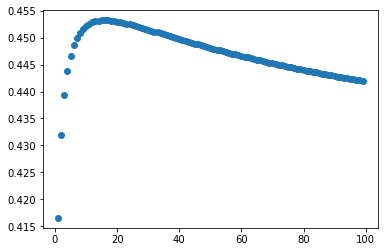

In [4]:
x = np.array((2,2,2,2,2,2)).reshape(1,-1)
# y = np.array((1,1,1,1,1,1)).reshape(1,-1)
y = np.array((0,0,0,0,0,0)).reshape(1,-1)
# cdist(x, y, 'euclidean')
dep = range(1, 100)

lengthscale = []
for depth in dep:
    ntk_val = NTK(depth=depth, c=2, bias=0, bias_bounds='fixed')(x,y)
    c = np.linalg.norm(x-y)/np.log(1/ntk_val)
    lengthscale.append(c[0,0])

plt.scatter(dep, lengthscale)

$$
    e^{-\frac{\|x-y\|}{c}} = U_{NTK}\\
    -\frac{\|x-y\|}{c} = \log(U_{NTK})\\
    \frac{\|x-y\|}{c} = -\log(U_{NTK})\\
    \frac{1}{c} = \frac{\log(U_{NTK}^{-1})}{\|x-y\|} \\
    c = \frac{\|x-y\|}{\log\left(\frac{1}{U_{NTK}}\right)}
$$

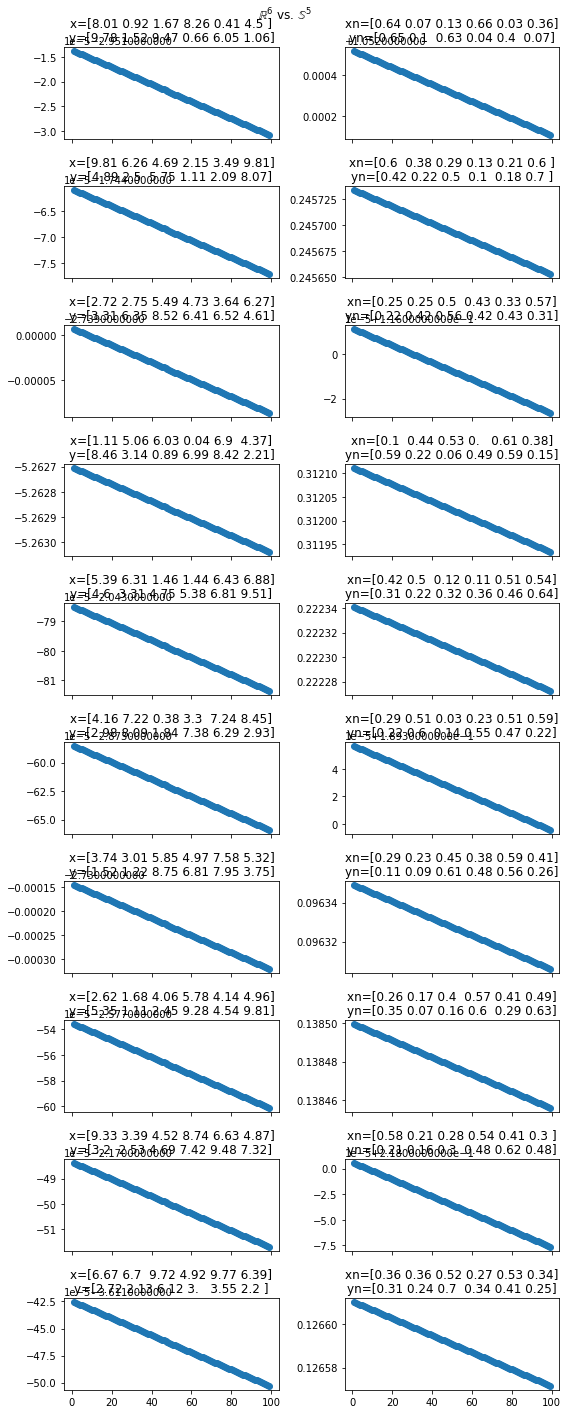

In [5]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html
rng = np.random.default_rng()
# seed 235689047
# [0, 5)

n_tests = 10
vector_size = 6
dep = range(1, 100)
fig, ax = plt.subplots(nrows=n_tests, ncols=2, figsize=(8, n_tests*2), sharex=True)
fig.suptitle(r"$\mathbb{R}^6$ vs. $\mathbb{S}^5$")

for test_num in range(0, n_tests):
    x = (10 - (0)) * rng.random((vector_size,)) + (0)
    y = (10 - (0)) * rng.random((vector_size,)) + (0)
    xn = normalize(x.reshape(1,-1))[0]
    yn = normalize(y.reshape(1,-1))[0]
    x=x.reshape(-1,1)
    y=y.reshape(-1,1)
    xn=xn.reshape(-1,1)
    yn=yn.reshape(-1,1)

    lengthscale = []
    lengthscale_n = []
    for depth in dep:
        ntk_val = NTK(
            depth=depth, 
            c=2, 
            bias=0, 
            bias_bounds='fixed'
        )(x,y)
        ntk_val_n = NTK(
            depth=depth, 
            c=2, 
            bias=0, 
            bias_bounds='fixed'
        )(xn,yn)
        c = np.linalg.norm(x-y)/np.log(1/ntk_val)
        cn = np.linalg.norm(xn-yn)/np.log(1/ntk_val_n)
        lengthscale.append(c[0,0])
        lengthscale_n.append(cn[0,0])

    ax[test_num][0].scatter(dep, lengthscale)
    ax[test_num][0].set_title(f'x={x.reshape(-1).round(2)}\ny={y.reshape(-1).round(2)}')
    ax[test_num][1].scatter(dep, lengthscale_n)
    ax[test_num][1].set_title(f'xn={xn.reshape(-1).round(2)}\nyn={yn.reshape(-1).round(2)}')
fig.tight_layout()

